# Gradient Descent

In [43]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [45]:
def sigmoid_activation(x):
    # compute the sigmoid activation value for a given input
    return 1.0 / (1 + np.exp(-x))

In [46]:
def predict(X, W):
    # take the dot product between our features and weight matrix
    preds = sigmoid_activation(np.dot(X, W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0.5] = 1
    
    # return the predictions
    return preds

In [47]:
# num of epochs
epochs = 100
# learning rate
alpha = 0.01

In [48]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of 
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [26]:
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, epochs):
    # take the dot product between our features ‘X‘ and the weight
    # matrix ‘W‘, then pass this value through our sigmoid activation
    # function, thereby giving us our predictions on the dataset
    preds = sigmoid_activation(np.dot(trainX, W))
    
    # now that we have our predictions, we need to determine the
    # ‘error‘, which is the difference between our predictions and
    # the true values
    error = preds - trainY
    loss = np.sum(error ** 2)
    losses.append(loss)
    
    # the gradient descent update is the dot product between our
    # features and the error of the predictions
    gradient = np.dot(trainX.T, error)
    
    # in the update stage, all we need to do is "nudge" the weight
    # matrix in the negative direction of the gradient (hence the
    # term "gradient descent" by taking a small step towards a set
    # of "more optimal" parameters
    W += -alpha * gradient
    
    # check to see if an update should be displayed
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1), loss))

[INFO] training...
[INFO] epoch=1, loss=458.0670749
[INFO] epoch=5, loss=11.2387086
[INFO] epoch=10, loss=9.2554102
[INFO] epoch=15, loss=7.0074488
[INFO] epoch=20, loss=6.9927512
[INFO] epoch=25, loss=6.9389996
[INFO] epoch=30, loss=5.7961503
[INFO] epoch=35, loss=4.2152115
[INFO] epoch=40, loss=2.7170447
[INFO] epoch=45, loss=1.3823752
[INFO] epoch=50, loss=1.0938441
[INFO] epoch=55, loss=0.8582819
[INFO] epoch=60, loss=0.5314716
[INFO] epoch=65, loss=0.2757149
[INFO] epoch=70, loss=0.1485739
[INFO] epoch=75, loss=0.0907975
[INFO] epoch=80, loss=0.0623805
[INFO] epoch=85, loss=0.0468182
[INFO] epoch=90, loss=0.0374390
[INFO] epoch=95, loss=0.0313256
[INFO] epoch=100, loss=0.0270816


In [27]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



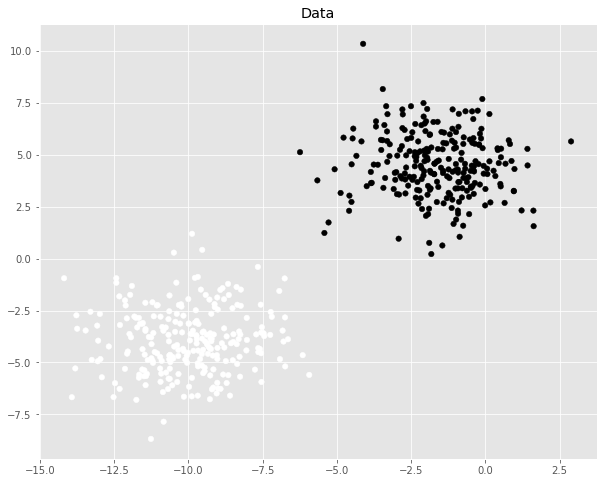

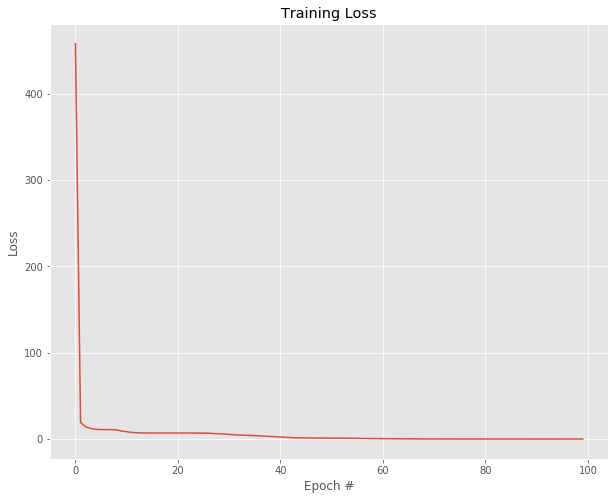

In [28]:
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:,0], testX[:,1], marker="o", c=testY.squeeze(), s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

# Mini-batch SGD

In [29]:
def next_batch(X, y, batchSize):
    # loop over our dataset ‘X‘ in mini-batches, yielding a tuple of
    # the current batched data and labels
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [30]:
# size of SGD mini-batches
batch_size = 32

In [31]:
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, epochs):
    # initialize the total loss for the epoch
    epoch_loss = []
    
    # loop over our data in batches
    for (batchX, batchY) in next_batch(X, y, batch_size):
        # take the dot product between our features ‘X‘ and the weight
        # matrix ‘W‘, then pass this value through our sigmoid activation
        # function, thereby giving us our predictions on the dataset
        preds = sigmoid_activation(np.dot(batchX, W))
    
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = preds - batchY
        batch_loss = np.sum(error ** 2)
        epoch_loss.append(batch_loss)
    
        # the gradient descent update is the dot product between our
        # features and the error of the predictions
        gradient = np.dot(batchX.T, error)

        # in the update stage, all we need to do is "nudge" the weight
        # matrix in the negative direction of the gradient (hence the
        # term "gradient descent" by taking a small step towards a set
        # of "more optimal" parameters
        W += -alpha * gradient
    
    # update our loss history by taking the average loss across all batches
    loss = np.average(epoch_loss)
    losses.append(loss)
    
    # check to see if an update should be displayed
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1), loss))

[INFO] training...
[INFO] epoch=1, loss=1.1713988
[INFO] epoch=5, loss=0.0421950
[INFO] epoch=10, loss=0.0309426
[INFO] epoch=15, loss=0.0254386
[INFO] epoch=20, loss=0.0218579
[INFO] epoch=25, loss=0.0192439
[INFO] epoch=30, loss=0.0172127
[INFO] epoch=35, loss=0.0155713
[INFO] epoch=40, loss=0.0142087
[INFO] epoch=45, loss=0.0130547
[INFO] epoch=50, loss=0.0120626
[INFO] epoch=55, loss=0.0111992
[INFO] epoch=60, loss=0.0104402
[INFO] epoch=65, loss=0.0097676
[INFO] epoch=70, loss=0.0091671
[INFO] epoch=75, loss=0.0086279
[INFO] epoch=80, loss=0.0081409
[INFO] epoch=85, loss=0.0076992
[INFO] epoch=90, loss=0.0072966
[INFO] epoch=95, loss=0.0069285
[INFO] epoch=100, loss=0.0065905


In [32]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



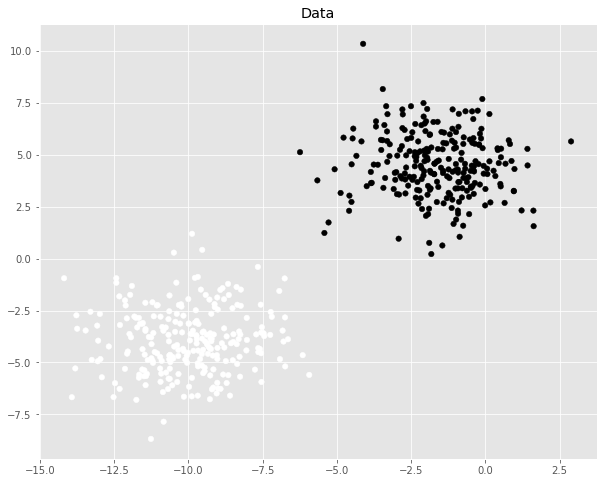

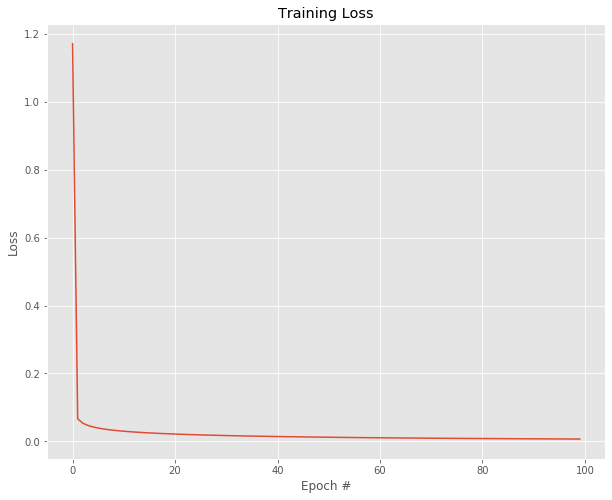

In [33]:
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:,0], testX[:,1], marker="o", c=testY.squeeze(), s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

# Regularization

In [50]:
# import the necessary packages
import cv2

class SimplePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        # store the target image width, height,
        # and interpolation method used when resizing
        self.width = width
        self.height = height
        self.inter = inter
        
    def preprocess(self, image):
        # resize the image to a fixed size, ignoring the aspect ratio
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)

In [51]:
import numpy as np
import cv2
import os

class SimpleDatasetLoader:
    def __init__(self, preprocessors=None):
        # store the image preprocessor
        self.preprocessors = preprocessors
        
        # if the preprocessors are None, initialize them as an empty list
        if self.preprocessors is None:
            self.preprocessors = []
            
    def load(self, imagePaths, verbose=-1):
        # initialize the list of features and labels
        data = []
        labels = []
        
        # loop over the input images
        for (i, imagePath) in enumerate(imagePaths):
            # load the image and extract the class label 
            # assuming that our path has the following format:
            # /path/to/dataset/{class}/{image}.jpg
            image = cv2.imread(imagePath)
            label = imagePath.split(os.path.sep)[-2]
            
            # check to see if our preprocessors are not None
            if self.preprocessors is not None:
                # loop over the preprocessors and apply each to the image
                for p in self.preprocessors:
                    image = p.preprocess(image)
                    
            # treat our processed image as a "feature vector" 
            # by updating the data list followed by the labels
            data.append(image)
            labels.append(label)
            
            # show an update every 'verbose' images
            if verbose > 0 and i >= 0 and (i + 1) % verbose == 0:
                print("[INFO] processed {}/{}".format(i + 1, len(imagePaths)))
                
        # return a tuple of the data and labels
        return (np.array(data), np.array(labels))

In [52]:
# path to input dataset
dataset = './cat-dog-panda/animals/'

In [54]:
import glob

# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = [file for file in glob.glob(dataset + "**/*.jpg", recursive=True)]

# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
simplePreprocessor = SimplePreprocessor(32, 32)
simpleDatasetLoader = SimpleDatasetLoader(preprocessors=[simplePreprocessor])
(data, labels) = simpleDatasetLoader.load(imagePaths, verbose=500)
data = data.reshape((data.shape[0], 32*32*3))

# show information on memory consumption of the images
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1000.0)))

# partition the data into training and testing splits 
# using 75% of the data for training
# and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

[INFO] loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000
[INFO] features matrix: 9.0MB


In [59]:
# import the necessary packages
from sklearn.linear_model import SGDClassifier

# loop over our set of regularizers
for r in (None, "l1", "l2"):
    # train a SGD classifier using a softmax loss function and the
    # specified regularization function for 10 epochs
    print("[INFO] training model with ‘{}‘ penalty".format(r))
    model = SGDClassifier(loss="log", penalty=r, max_iter=100, 
                          learning_rate="constant", eta0=0.01, random_state=42)
    model.fit(trainX, trainY)
    
    # evaluate the classifier
    acc = model.score(testX, testY)
    print("[INFO] ‘{}‘ penalty accuracy: {:.2f}%".format(r, acc * 100))

[INFO] training model with ‘None‘ penalty
[INFO] ‘None‘ penalty accuracy: 53.87%
[INFO] training model with ‘l1‘ penalty
[INFO] ‘l1‘ penalty accuracy: 53.20%
[INFO] training model with ‘l2‘ penalty
[INFO] ‘l2‘ penalty accuracy: 55.20%
